In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [2]:
points, co = make_blobs(n_samples=400, n_features=8, centers=5,
                     cluster_std=1, random_state=15)

In [3]:
def centroids(points,k):
    centr = points.copy()
    np.random.shuffle(centr)
    return centr[:k]
    
def closest_centr(points,centr):
    distances = np.sqrt(((points - centr[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [4]:
def move_centroids(points, closest, centroids):
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [5]:
def kmeans(points,k):
    c = centroids(points,k)
    while np.sqrt(((move_centroids(points, closest_centr(points, c), c)[:, np.newaxis] - c[:, np.newaxis])**2).sum(axis=2)).all()>0.000001:
        c = move_centroids(points, closest_centr(points, c), c)
    return closest_centr(points, c)

# Compare with sklearn

In [6]:
km = KMeans(n_clusters=5)


In [7]:
%time
km.fit(points)
pred = km.predict(points)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.29 µs


In [8]:
%time
pred_ = kmeans(points,5)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.05 µs


/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


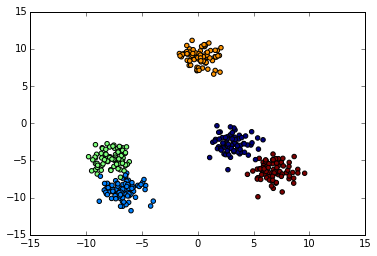

In [9]:
plt.scatter(points[:,0], points[:,1], c = pred)

/usr/lib/python3/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


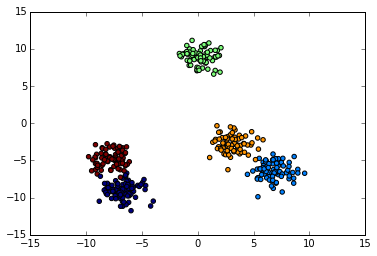

In [10]:
plt.scatter(points[:,0], points[:,1], c = pred_)